**Vom afundar**

**2. Obtenção dos Dados**

In [1]:
#importar os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas

pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Q1** Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [3]:
# verificando as dimensões do DataFrame

    # *shape* procura o total de váriaveis(colunas) e entradas (linhas), sendo [0] as linhas e [1] as colunas

print('Variáveis:\t{}\nEntradas:\t{}'.format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


**3. Exploração dos Dados**

**Dicionário de Dados**


- **PassengerID**: Número de identificação do passageiro

- **Survived:**  Informa se o passageiro sobreviveu ao desastre

    0 = Não
    
    1 = Sim
 
- **Pclass:** Classe do bilhete

    1 = 1ª Classe
    
    2 = 2ª Classe
    
    3 = 3ª Classe
    

- **Name:** Nome do passageiro

- **Sex:** Sexo do passageiro

- **Age:** Idade do passageiro

- **SibSp:** Quantidade de cônjuges e irmãos a bordo

- **Parch:** Quantidade de pais e filhos a bordo

- **Ticket:** Número da passagem

- **Fare:** Preço da Passagem

- **Cabin:** Número da cabine do passageiro

- **Embarked:** Porto no qual o passageiro embarcou
    -    C = Cherbourg
    -    Q = Queenstown
    -    S = Southampton

**Q1. Quais os tipos de cada variável?**

- Variáveis Numéricas
    - Discretas
       - Pclass
       - SibSp
       - Parch
    - Contínuas
        - Age
        - Fare
    - Alvo
        - Survived
    - Chave Primária
        - PassengerId
- Variáveis Categóricas
    - Name
    - Sex
    - Ticket
    - Cabin
    - Embarked



In [4]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

In [5]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [6]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

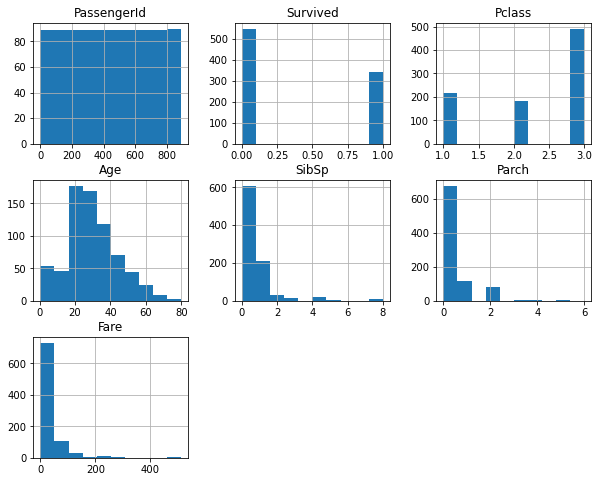

In [7]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8))

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [8]:
# Analisar a probalidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

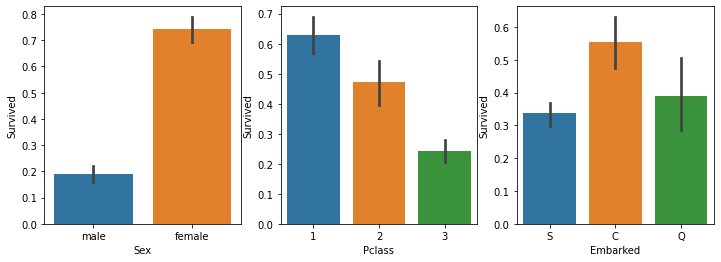

In [9]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


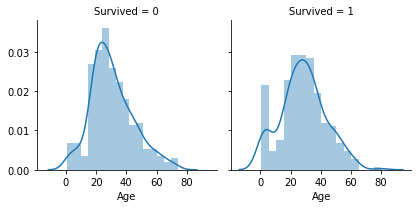

In [10]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

array([[<AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Pclass', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>],
       [<AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

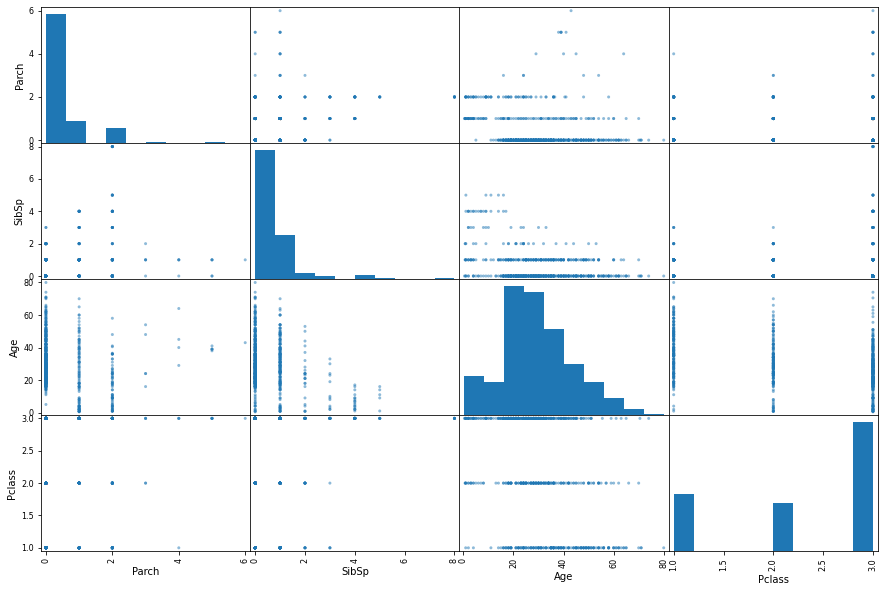

In [11]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10))

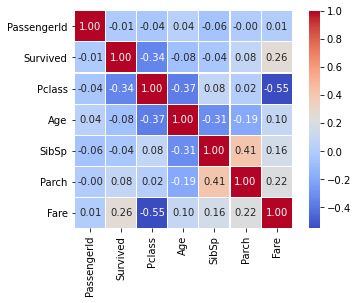

In [12]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
           vmax=1.0, square=True, linecolor='white', annot=True);

In [13]:
train.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                   891   891    891   204      889
unique                  891     2    681   147        3
top     Doling, Miss. Elsie  male   1601    G6        S
freq                      1   577      7     4      644

In [14]:
# salavr os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

#concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print('df_merged.shape: ({} x {})'.format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [15]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [17]:
# age e fare utilizei o valor da mediana e para embarked, o valor de maior frequência

# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [18]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embarked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_914  Embarked_C  \
0       3    0  22.0      1      0   7.2500             0           0   
1       1    1  38.0      1      0  71.2833             0           1   
2       3    1  26.0      0      0   7.9250             0           0   
3       1    1  35.0      1      0  53.1000             0           0   
4       3    0  35.0      0      0   8.0500             0           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [20]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

**Construção do Modelo de Avaliação** 
- Modelos de *Machine Learning* básicos:
    - Modelo de Regressão Logística
    - Modelo de Árvore de Decisão
    

In [21]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print('Acurácia do modelo de Regressão Logística: {}'.format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [23]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': y_pred_lr
})



In [24]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print('Acurácia do modelo de Árvore de Decisão: {}'.format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [26]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

**Eu sobreviveria ao Titanic?**

In [27]:
# declarar os valores das variáveis para mim e minha esposa
joao_felipe = np.array([2, 0, 23, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
gabriela = np.array([2, 1, 12, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("J:\t{}".format(tree_model.predict(joao_felipe)[0]))
print("Gabriela:\t{}".format(tree_model.predict(gabriela)[0]))

NameError: name 'carlos_melo' is not defined